<a href="https://colab.research.google.com/github/marcusvpimentel/Mestrado/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.tree import DecisionTreeClassifier

In [2]:
## Carregar os Dados de Treino
titanic_train = pd.read_csv('/content/train.csv')
y = titanic_train["Survived"]

titanic_train = titanic_train.drop('Survived', axis=1)
titanic_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## Carregar os Dados de Teste
titanic_test = pd.read_csv('/content/test.csv')


In [4]:
titanic_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
titanic_train.shape

(891, 11)

### Identificar váriaveis numéricas e categoricas

In [6]:
for column in titanic_train.columns:
  print(f"{column:>12} {len(set(titanic_train[column])):4} {titanic_train[column].dtype}")

 PassengerId  891 int64
      Pclass    3 int64
        Name  891 object
         Sex    2 object
         Age  265 float64
       SibSp    7 int64
       Parch    7 int64
      Ticket  681 object
        Fare  248 float64
       Cabin  148 object
    Embarked    4 object


In [7]:
## Variáveis Númericas
num_var = titanic_train.select_dtypes('number')
num_var

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


### Tratamento de valores inconsistentes

In [8]:
titanic_train.loc[titanic_train['Age'] < 0]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
## Dados Nulos
titanic_train.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
## Localizar registro nulos
titanic_train.loc[pd.isnull(titanic_train['Age'])]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
859,860,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [11]:
titanic_train.groupby(["Embarked"]).size()

Embarked
C    168
Q     77
S    644
dtype: int64

In [12]:
titanic_train.Age.mean()

29.69911764705882

In [13]:
maleMeanAge = titanic_train.where(titanic_train.Sex == "male").Age.mean()
maleMeanAge


30.72664459161148

In [14]:
titanic_train.where(titanic_train.Sex == "male").Age.isnull

<bound method Series.isnull of 0      22.0
1       NaN
2       NaN
3       NaN
4      35.0
       ... 
886    27.0
887     NaN
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64>

In [15]:
femaleMeanAge = titanic_train.where(titanic_train.Sex == "female").Age.mean()
femaleMeanAge

27.915708812260537

In [16]:
def substituirValoresNulos(X):
  X.Embarked.fillna("S", inplace=True)

  maleMeanAge = X.where(X.Sex == "male").Age.mean()
  X.loc[(X.Sex == "male") & (X.Age.isna()), 'Age'] = maleMeanAge

  femaleMeanAge = X.where(X.Sex == "female").Age.mean()
  X.loc[(X.Sex == "female") & (X.Age.isna()), 'Age'] = femaleMeanAge

  return X

In [17]:
def removerColunas(X):
  colunasIndesejadas_ = ['PassengerId','Name','Ticket','Cabin','Fare']
  return X.drop(colunasIndesejadas_, axis=1)

In [18]:
def convert_object_to_category(X):
    for column in X.select_dtypes(include='object').columns:
        X[column] = X[column].astype('category').cat.codes

In [19]:
X_train = substituirValoresNulos(titanic_train)
X_test = substituirValoresNulos(titanic_test)


In [20]:
X_New = removerColunas(X_train)
X_test = removerColunas(X_test)

In [21]:
convert_object_to_category(X_New)
convert_object_to_category(X_test)

In [22]:
for column in X_test.columns:
  print(f"{column:>12} {sum(X_test[column].isnull())}")

      Pclass 0
         Sex 0
         Age 0
       SibSp 0
       Parch 0
    Embarked 0


### Rodar o modelo

In [23]:
#from sklearn.preprocessing import OneHotEncoder


#encoder  = OneHotEncoder()
#X = encoder.fit_transform(X_New)
#X_test = encoder.fit_transform(X_test)




In [24]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_validate

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=123)
model.fit(X_New, y)

ypred = model.predict(X_test)

scores = cross_validate(model, X_New, y)
scores, np.mean(scores['test_score'])



({'fit_time': array([0.17048001, 0.19751   , 0.17002344, 0.18229437, 0.19561243]),
  'score_time': array([0.00921035, 0.01234651, 0.01102972, 0.01988316, 0.01030421]),
  'test_score': array([0.83798883, 0.83146067, 0.82022472, 0.79775281, 0.85393258])},
 0.8282719226664993)

In [27]:
submission = pd.read_csv('gender_submission.csv')
ypred = model.predict(X_test)
submission['Survived'] = ypred
submission.to_csv('tree_submission.csv', index=False)

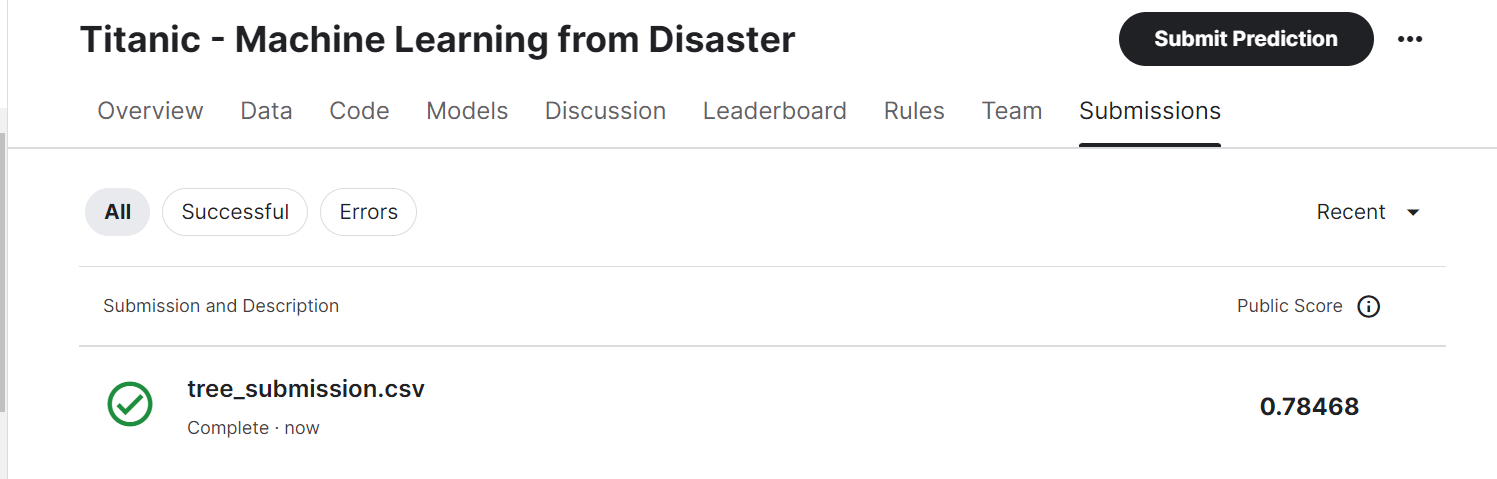

In [28]:
score = 0.78468
(score-0.65)*125

16.835000000000004